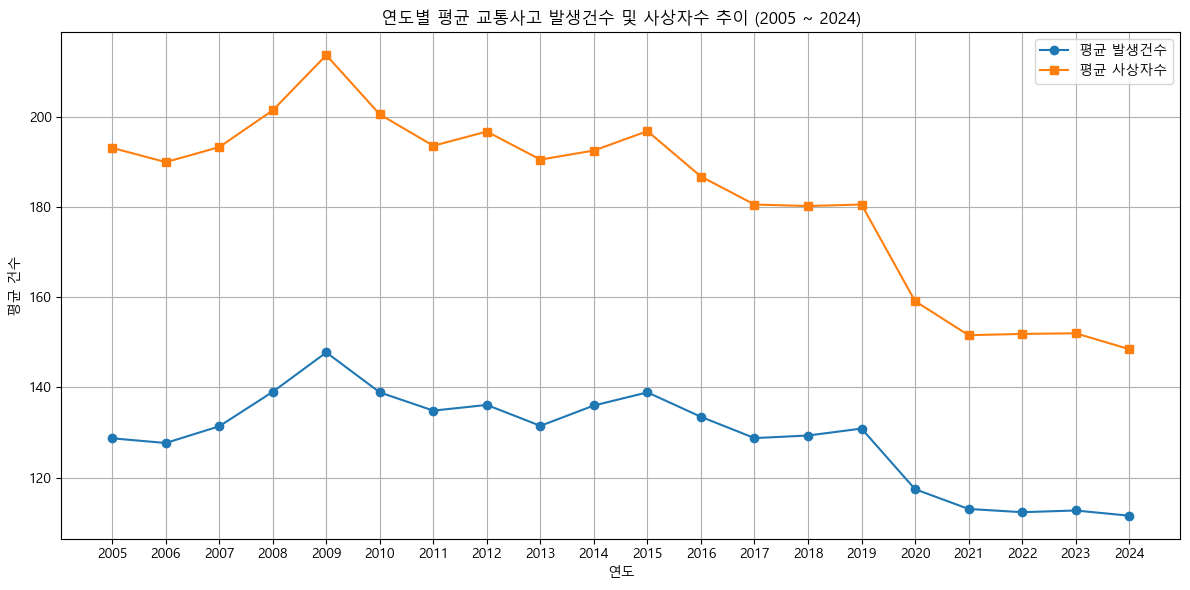

In [4]:
#연도별 평균 교통사고 추이
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('data/merged_data/Bus_accident_total_data.csv', dtype={'년월': str})


df['연도'] = df['년월'].str.slice(0, 4).astype(int)


df_filtered = df[(df['연도'] >= 2005) & (df['연도'] <= 2024)].copy()

df_filtered['발생건수'] = pd.to_numeric(df_filtered['발생건수'], errors='coerce')
df_filtered['사망자수'] = pd.to_numeric(df_filtered['사망자수'], errors='coerce')
df_filtered['부상자수'] = pd.to_numeric(df_filtered['부상자수'], errors='coerce')

df_filtered['사상자수'] = df_filtered['사망자수'] + df_filtered['부상자수']

yearly_avg = df_filtered.groupby('연도')[['발생건수', '사상자수']].mean().reset_index()
yearly_avg.columns = ['연도', '평균_발생건수', '평균_사상자수']

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['연도'], yearly_avg['평균_발생건수'], marker='o', label='평균 발생건수')
plt.plot(yearly_avg['연도'], yearly_avg['평균_사상자수'], marker='s', label='평균 사상자수')

plt.title('연도별 평균 교통사고 발생건수 및 사상자수 추이 (2005 ~ 2024)')
plt.xlabel('연도')
plt.ylabel('평균 건수')
plt.grid(True)
plt.xticks(yearly_avg['연도'])
plt.legend()
plt.tight_layout()
plt.show()

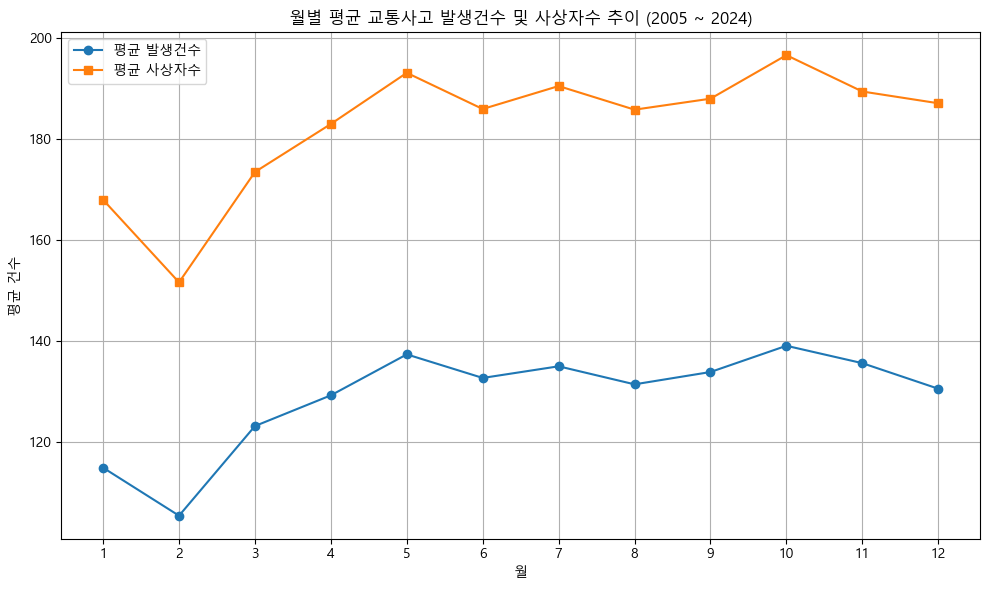

In [6]:
#월별 평균 교통사고 추이
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/merged_data/Bus_accident_total_data.csv', dtype={'년월': str})

df['연도'] = df['년월'].str.slice(0, 4).astype(int)
df['월'] = df['년월'].str.slice(5, 7).astype(int)

df_filtered = df[(df['연도'] >= 2005) & (df['연도'] <= 2024)].copy()

df_filtered['발생건수'] = pd.to_numeric(df_filtered['발생건수'], errors='coerce')
df_filtered['사망자수'] = pd.to_numeric(df_filtered['사망자수'], errors='coerce')
df_filtered['부상자수'] = pd.to_numeric(df_filtered['부상자수'], errors='coerce')

df_filtered['사상자수'] = df_filtered['사망자수'] + df_filtered['부상자수']

monthly_avg = df_filtered.groupby('월')[['발생건수', '사상자수']].mean().reset_index()
monthly_avg.columns = ['월', '평균_발생건수', '평균_사상자수']

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['월'], monthly_avg['평균_발생건수'], marker='o', label='평균 발생건수')
plt.plot(monthly_avg['월'], monthly_avg['평균_사상자수'], marker='s', label='평균 사상자수')

plt.title('월별 평균 교통사고 발생건수 및 사상자수 추이 (2005 ~ 2024)')
plt.xlabel('월')
plt.ylabel('평균 건수')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()